# Hands-on Activity 3.1: Data Analysis

In [13]:
import pandas as pd
brainFile = r'C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 019\brainsize.txt'
brainFrame = pd.read_csv(brainFile, delimiter='\t')

In [14]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [15]:
# we need to turn the text file into a csv file
brainFrame.to_csv(r'C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 019\brainsize.csv', index = None)

In [16]:
brainFrame_csv = pd.read_csv(r'C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 019\brainsize.csv')
brainFrame_csv.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [17]:
brainFrame_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     40 non-null     object 
 1   FSIQ       40 non-null     int64  
 2   VIQ        40 non-null     int64  
 3   PIQ        40 non-null     int64  
 4   Weight     38 non-null     float64
 5   Height     39 non-null     float64
 6   MRI_Count  40 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.3+ KB


In [29]:
brainFrame_csv[brainFrame_csv.isnull().any(axis = 1)]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Male,140,150,124,NaN,72.5,1001121
20,Male,83,83,86,NaN,NaN,892420


    As we can see, we have two patients with missing values. One of them (patient 1) is missing a value for Weight while patient 20 is missing a value for Height and Weight. This was done by the researchers for the purpose of confidentiality

# Part 2: Scatterplot Graphs and Correlatable Variables

In [30]:
brainFrame_csv.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

men_df = brainFrame_csv[brainFrame_csv["Gender"] == "Male"]
women_df = brainFrame_csv[brainFrame_csv["Gender"] == "Female"]

In [35]:
women_smarts = women_df[["FSIQ","VIQ","PIQ"]].mean(axis = 1)
men_smarts = men_df[["FSIQ","VIQ","PIQ"]].mean(axis = 1 )

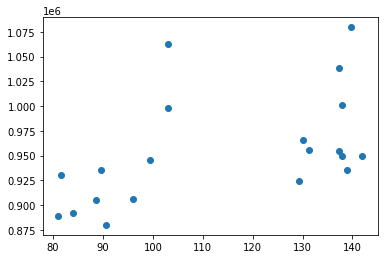

In [37]:
plt.scatter(men_smarts, men_df["MRI_Count"])
plt.show();

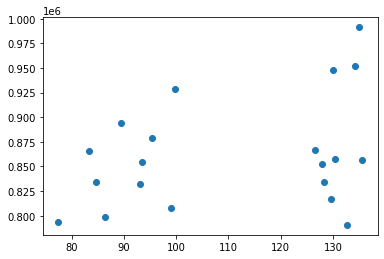

In [38]:
plt.scatter(women_smarts, women_df["MRI_Count"])
plt.show();

In [39]:
brainFrame_csv.corr(method = "pearson")

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled with 1s? Is that a coincidence? Explain.
        
        The diagonal cells are filled with 1s since those cells correspond with a correlation with themeselves. So the same variable is going to be 100% correlatiedwith itself.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1 diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.
        
        The column and the index variables are the same. The similar and mirrored values are simply variable x correlating with variable y and vice-versa.

In [40]:
women_df.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [42]:
men_df.corr(method = "pearson")

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


# Part 4: Visualizing

<AxesSubplot:>

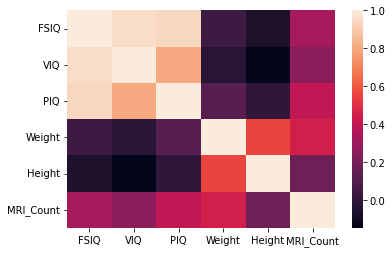

In [43]:
sns.heatmap(women_df.corr(method = "pearson"), )

<AxesSubplot:>

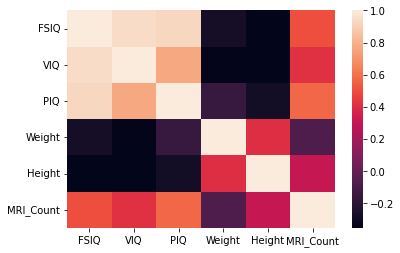

In [44]:
sns.heatmap(men_df.corr(method = 'pearson'))

Many variable pairs present correlation close to zero. What does that mean?

                The variable pairs with low correlation that is close to zero indicates that there is little to no correlation between the variables or that the variables do no present a linear relationship.
Why separate the genders?

                The genders are seperated to reveal a deeper insight. We know that females and males have biological differences. These biological differences may point to a difference in MRI_count values. We don't want to end up having the conclusion, for example, that a certain feature that shows a relationship with the MRI_count for females is also the same for males WHEN this observation may not be true. Another example is that notice how the two largets correlated variables with brain size, using both male and female stats, were height and weight... Now seperating the data based on Gender and looking at the correaltion table for each, we can see that height and weight are actually poorly correlated with the brain size column, a very different from our previous observation.
What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

                For the women dataset, it seems Weight is highly correlated with brain size, which is surprising since there doesn't seem to be any biological connection between the two. For the male dataset, the highest variable correlated with brain size was PIQ, followed by FSIQ, and then by VIO. I would expect something like this to be more natural since these variable are about the things that are directly connected to the brain, that is smartness/intelligence. 

# Conlcusion

The exercise was a great introduction on Data Analysis that utilizes visualization. It was not too difficult since this was all something I was already familiar with. I would recommend this exercise to anyone who is interested in learning more about Data Analysis and who is also a beginner. 